In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from skipper import observe

from ekfplot import plot as ek

import sys
sys.path.append('../scripts/')
import our_pointings
import sigjson_s2024a

ek.set_formatting()

In [3]:
halpha_pointings, oiii_pointings =  our_pointings.load_springfields()

In [4]:
copilot_fname = '/Users/kadofong/Downloads/merian0408/db_merian.fits'
tele_fname = '/Users/kadofong/Downloads/merian0408/tele20240408.csv'

coo_o = observe.CopilotOutput ( copilot_fname, oiii_pointings, skySB_0=22.1 )
coo_h = observe.CopilotOutput ( copilot_fname, halpha_pointings )

In [5]:
fields = oiii_pointings['object'].str.extract(r'(.*?(?=_))')[0]

In [6]:
obsdates = sigjson_s2024a.obsdates
obsfilters = sigjson_s2024a.obsfilters

In [7]:
completed = coo_o.identify_completed_pointings(300.)

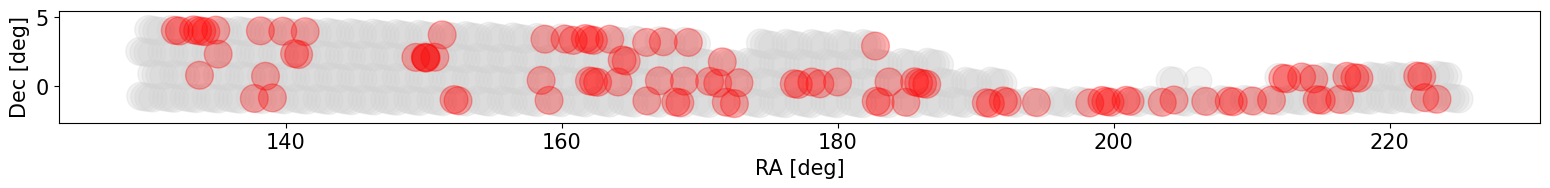

In [8]:
fig = plt.figure(figsize=(22,2))
ax = plt.subplot(111)
ax.set_aspect('equal')

t_eff_min = 400.
reobs = completed['t_eff'] < t_eff_min
clist = ['lightgrey','r']

fov_radius = (3.18/np.pi)**0.5

plt.scatter(
    completed['racenter'],
    completed['deccenter'],
    s=1,
    alpha=0.0
)
for idx,mask in enumerate([~reobs,reobs]):
    for name,row in completed[mask].iterrows():
        circ = patches.Circle(
            (row['racenter'],row['deccenter']),
            fov_radius,
            color=clist[idx],
            alpha=0.3
        )
        ax.add_patch(circ)

ax.set_xlabel(ek.common_labels['ra'])
ax.set_ylabel(ek.common_labels['dec'])
plt.tight_layout ()
plt.savefig('/Users/kadofong/Desktop/reobs.png')

In [9]:
completed[reobs].to_csv('/Users/kadofong/Desktop/reobs_at_400.csv')

In [13]:
from astropy import time

In [41]:
filt = 'N540'
completed = coo_o.identify_completed_pointings(300.)

obstimes = time.Time(completed['mjd_obs'], format='mjd')

21.196162913775336


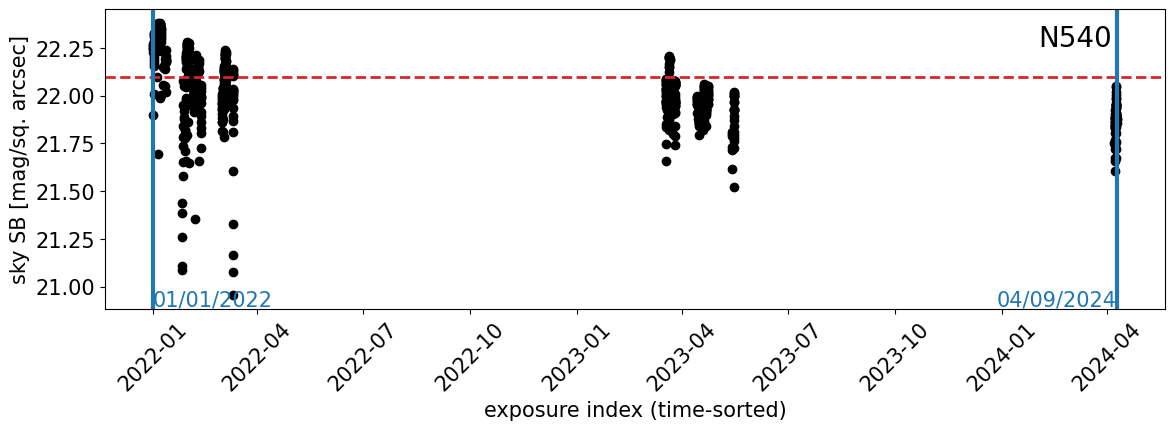

In [55]:
plt.figure ( figsize=(12,4)) 
plt.scatter(
    obstimes.to_datetime (),
    completed['sky'],
    color='k'
)
ek.text(0.95,0.95, filt, fontsize=20)
plt.axhline(22.1,color='tab:red', lw=2., ls='--')
plt.xlabel('exposure index (time-sorted)')
plt.ylabel(r'sky SB [mag/sq. arcsec]')
plt.tight_layout()
plt.xticks(rotation=45)


for fn in ['min','max']:
    timeobj = getattr(obstimes, fn)().to_datetime()
    plt.axvline( timeobj, lw=3)
    #yplace = 0.2*np.subtract(*plt.ylim()) + plt.ylim()[0]
    #print(yplace)
    plt.text(
        timeobj,
        20.9,
        timeobj.strftime('%m/%d/%Y'),
        ha = fn == 'min' and 'left' or 'right',
        color='C0'
    )

print(0.2*abs(np.subtract(*plt.ylim())) + plt.ylim()[0])

plt.savefig(f'/Users/kadofong/Desktop/sb_v_time_{filt}.png')